In [1]:
import pandas as pd
from pybedtools import BedTool

### Information about BED Files (genome.ucsc.edu)

The BED (Browser Extensible Data) format is a text file format used to store genomic regions as coordinates and associated annotations. The data are presented in the form of columns separated by spaces or tabs. (Wikipedia)

The first three required BED fields are:

- **chrom** - The name of the chromosome (e.g. chr3, chrY, chr2_random) or scaffold (e.g. scaffold10671).
- **chromStart** - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.
- **chromEnd** - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature, however, the number in position format will be represented. For example, the first 100 bases of chromosome 1 are defined as chrom=1, chromStart=0, chromEnd=100, and span the bases numbered 0-99 in our software (not 0-100), but will represent the position notation chr1:1-100.


In [2]:
rbp = pd.read_excel('~/projects/ClipNet/archishma/mmc2.xlsx', sheet_name = 'CandidateRBDpep')
rbp.head()

,ENSG,ProtID,Symbol,MS-identified peptide,Start,Stop,category,Uniqueness,domain,enzyme,LysC/ArgC proteolytic fragment,fragmentStart,fragmentStop
0,ENSG00000132541,P52758,HRSP12,AAGCDFTNVVK,68.0,78.0,CandidateRBDpep,UniqueGene,other,LysC,AAGCDFTNVVK,68.0,78.0
1,ENSG00000112651,Q5T653,MRPL2,AAGTCGVLLR,209.0,218.0,CandidateRBDpep,UniqueGene,other,LysC,RWIIATENMQAGDTILNSNHIGRMAVAAREGDAHPLGALPVGTLIN...,149.0,219.0
2,ENSG00000114867,Q04637,EIF4G1,AALSEEELEKK,1235.0,1245.0,CandidateRBDpep,UniqueGene,other,LysC,AALSEEELEKKSKAIIEEYLHLNDMK,1235.0,1260.0
3,ENSG00000167112,O95900,TRUB2,AATPQVAAELEK,285.0,296.0,CandidateRBDpep,UniqueGene,other,LysC,TTAVCTQVRRTRDGFFTLDSALLRTQWDLTNIQDAIRAATPQVAAELEK,248.0,296.0
4,ENSG00000040341,Q9NUL3,STAU2,AATTVLQELK,264.0,273.0,CandidateRBDpep,UniqueGene,classical,LysC,KLSKKRAATTVLQELK,258.0,273.0


- genes of interest: EIF3I, SF3A1
- transcript_coords has information about transcripts
- region_anno has information about regions, localization, etc 

In [3]:
transcript_coords = BedTool('/home/hsher/gencode_coords/gencode.v33.transcript.gff3')
region_anno = BedTool('/home/hsher/gencode_coords/gencode.v33.combine.sorted.gff3')

In [4]:
from collections import Counter

In [5]:
encode3 = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)
encode4 = pd.read_csv('/home/hsher/projects/ClipNet/archishma/ENCODE4_1214.csv')

In [6]:
encode3.loc[encode3['RBP'].str.contains('SF3A1')]

,uID,RBP,Cell line,CLIP_rep1,CLIP_rep2,INPUT


In [7]:
encode4.loc[encode4['RBP'].str.contains('SF3A1')]

,Unnamed: 0,uid,Batch,RBP,prefix,bam_0,bam_1,bam_control,plus_0,plus_1,plus_control,minus_0,minus_1,minus_control,bed_0,bed_1,idr,Cell Line
29,29,4048,batch12,SF3A1,encode4_batch12.4048,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,K562
48,48,4117,batch17,SF3A1,encode4_batch17.4117,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,/projects/ps-yeolab5/encore/processing/encore_...,HepG2


In [8]:
# idr has the path to the files
# look at the files - which region, type of transcript 
bed_SF3A1_4048 = encode4.loc[29,'idr']
bed_SF3A1_4117 = encode4.loc[48,'idr']

### Information about SF3A1 (UID 4048):
- Batch 12
- Cell Line K562

In [9]:
SF3A1_idr_4048 = BedTool(bed_SF3A1_4048)
SF3A1_idr_4117 = BedTool(bed_SF3A1_4117)

In [10]:
# counter for how many chromosomes SF3A1_4048 appears on
chrom_count = pd.DataFrame([Counter([t.chrom for t in SF3A1_idr_4048]), Counter([t.chrom for t in SF3A1_idr_4117])], index = ['K562', 'HepG2'])

In [11]:
chrom_count.fillna(0,inplace =True)

In [21]:
chrom_count.T

,K562,HepG2
chrX,16.0,135.0
chr8,34.0,82.0
chr11,28.0,118.0
chr1,85.0,192.0
chr3,49.0,139.0
chr18,10.0,16.0
chr10,23.0,62.0
chr9,20.0,70.0
chr7,30.0,142.0
chr17,42.0,166.0


In [22]:
chrom_count.sum(axis = 1)

K562      621.0
HepG2    2083.0
dtype: float64

In [12]:
# make into precentage
chrom_count_perc = chrom_count.div(chrom_count.sum(axis = 1), axis = 0)

<AxesSubplot:>

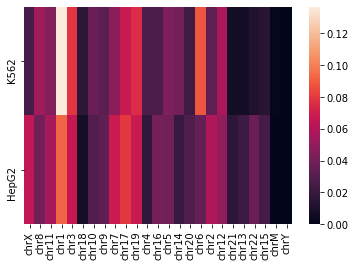

In [13]:
import seaborn as sns
sns.heatmap(chrom_count_perc) # k562 has way more binding on chr1 proportionally?

<AxesSubplot:xlabel='K562', ylabel='HepG2'>

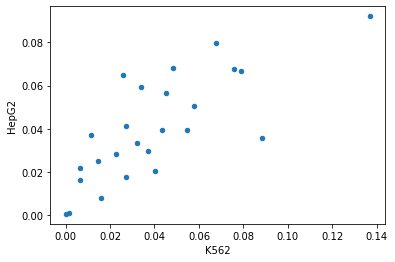

In [14]:
chrom_count_perc.T.plot.scatter(x = 'K562', y = 'HepG2')

In [15]:
chrom_count_perc.T.sort_values('K562', ascending = False)

,K562,HepG2
chr1,0.136876,0.092175
chr6,0.088567,0.035526
chr3,0.078905,0.066731
chr19,0.075684,0.067691
chr17,0.067633,0.079693
chr12,0.057971,0.050408
chr8,0.054750,0.039366
chr7,0.048309,0.068171
chr11,0.045089,0.056649
chr5,0.043478,0.039366


In [16]:
# once again, using transcript_coords, can intersect to find hits 
transcriptsbound_SF3A1_4048 = transcript_coords.intersect(SF3A1_idr_4048, s= True, u = True).saveas()
# once again, using transcript_coords, can intersect to find hits 
transcriptsbound_SF3A1_4117 = transcript_coords.intersect(SF3A1_idr_4117, s= True, u = True).saveas()

In [17]:
#since counter is already imported-- use it to see how many there are of each type of transcript. 
pd.DataFrame([Counter([a.attrs['transcript_type'] for a in transcriptsbound_SF3A1_4048]),
                      Counter([a.attrs['transcript_type'] for a in transcriptsbound_SF3A1_4117])
             ]
                              
                     ).T

,0,1
protein_coding,248.0,775.0
lncRNA,14.0,72.0
snRNA,1.0,3.0
rRNA_pseudogene,22.0,3.0
nonsense_mediated_decay,8.0,13.0
snoRNA,5.0,3.0
rRNA,1.0,NaN
processed_transcript,1.0,4.0
scaRNA,1.0,NaN
processed_pseudogene,1.0,NaN


In [18]:
# which regions is it bound?
regionsbound_SF3A1_4048 = region_anno.intersect(SF3A1_idr_4048, s = True, u = True).saveas()
regionsbound_SF3A1_4117 = region_anno.intersect(SF3A1_idr_4117, s = True, u = True).saveas()

In [19]:
# just an example with the first one-- the "index 2" shows the region it's bound in

regions_count = pd.DataFrame([Counter([a[2] for a in regionsbound_SF3A1_4048]),
                      Counter([a[2] for a in regionsbound_SF3A1_4117])
             ]
                              
                     ).T

In [20]:
regions_count.div(regions_count.sum(axis = 0), axis = 1) # mostly in exonic region; CDS more than others

,0,1
exon,0.448737,0.458170
five_prime_UTR,0.034175,0.031443
transcript,0.141159,0.214486
CDS,0.295691,0.149916
three_prime_UTR,0.080238,0.145985


In [ ]:
# bam:
#1. read, where the read maps (chr1, 100, 120, '-')
#2. -> compare to genome coordinates (chr1, 110, '-') -> start of exon

# Comment
1. You did a great job! To make information more concise, try using dataframe and plots to summarize information and make the comparison between 2 cell lines easier.

2. Your finding for chromosome discrepency is correct. The # of peaks on chrX in HepG2 is way more than those in K562. But the total # peaks are also a lot more in HpeG2. That's why I compare the precentage instead of counts. The reason of counts difference might be.

    - HepG2's experiment was done better. We had better antibody pulldown somehow
    - In HpeG2 the expression of SF3A4 is higher. Therefore more peaks

3. Overall the trend of chromosome, transcript_type and region distribution is pretty consistent. I wouldn't worry too much if the data is not good.

4. Why HepG2 and K562 will have different peaks?

    - Today Fred's talk actually touched on this question
    - RNA expression different
    - RBP expression different
    - competitors are different

these all together are frequently summarized as "cellular context"
you can read Fred's paper
https://yeolab.github.io/papers/2018/Fred_molecularCell_2018.pdf

5. The most interesting thing you found is the region distribution. SF3A1 binds lots of exons. What can it do there? (function)

    - SF3A1 Gene (Protein Coding): This gene encodes a subunit of the splicing factor 3a protein complex. The splicing factor 3a heterotrimer is a component of the mature U2 small nuclear ribonucleoprotein particle (snRNP). U2 small nuclear ribonucleoproteins play a critical role in spliceosome assembly and pre-mRNA splicing.
    - read about rbp vs splicing: http://www.nature.com/articles/nrg3778

6. let's have a finer resolution on RBP and splicing